# Midterm Project Background Work
*Matthew Ueckermann*


## Importing the data

Can import one year as:

In [2]:
import pandas as pd
import time

df_2019 = pd.read_csv('https://enviro.epa.gov/enviro/efservice/MV_TRI_BASIC_DOWNLOAD/year/=/2019/fname/TRI_2019_US.csv/CSV',low_memory=False)
# to scrape later, do in for loop. Add time delay for politenes

print("done")

done


In [3]:
df_2019.head()

,1. YEAR,2. TRIFD,3. FRS ID,4. FACILITY NAME,5. STREET ADDRESS,6. CITY,7. COUNTY,8. ST,9. ZIP,10. BIA,...,108. 8.3 - ENERGY RECOVER OF,109. 8.4 - RECYCLING ON SITE,110. 8.5 - RECYCLING OFF SIT,111. 8.6 - TREATMENT ON SITE,112. 8.7 - TREATMENT OFF SITE,113. PRODUCTION WSTE (8.1-8.7),114. 8.8 - ONE-TIME RELEASE,115. PROD_RATIO_OR_ ACTIVITY,116. 8.9 - PRODUCTION RATIO,Unnamed: 116
0,2019,77015FRMNT2239H,110000460965,GB BIOSCIENCES LLC,2239 HADEN RD,HOUSTON,HARRIS,TX,77015,NaN,...,0.0,0.0,0.0,11.0,0.0,214.10,NaN,PRODUCTION,0.00,NaN
1,2019,2974WCMSTL6371C,110040511407,CM STEEL INC,6371 CAMPBELL ROAD,YORK,YORK,SC,29745,NaN,...,0.0,0.0,30200.0,0.0,0.0,30225.40,NaN,PRODUCTION,1.20,NaN
2,2019,77015FRMNT2239H,110000460965,GB BIOSCIENCES LLC,2239 HADEN RD,HOUSTON,HARRIS,TX,77015,NaN,...,0.0,0.0,0.0,0.0,0.0,13395.01,NaN,PRODUCTION,0.00,NaN
3,2019,5535WTCHTC1PREC,110031294882,TECH-ETCH INC,1 PRECISION DR,LITCHFIELD,MEEKER,MN,55355,NaN,...,0.0,0.0,0.0,0.0,0.0,0.00,NaN,NaN,NaN,NaN
4,2019,51031WLLSD11911,110000414034,WELLS ENTERPRISES INC SOUTH ICE CREAM PLANT,1191 18TH ST SW,LE MARS,PLYMOUTH,IA,51031,NaN,...,0.0,0.0,0.0,156541.0,0.0,156541.00,NaN,PRODUCTION,0.97,NaN


In [4]:
# Want to select/keep only the data that we care about:
#df_2019_trimmed = df_2019[["1. YEAR","2. TRIFD","8. ST","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","38. CLEAN AIR ACT CHEMICAL","39. CLASSIFICATION","40. METAL","42. CARCINOGEN","45. 5.1 - FUGITIVE AIR","46. 5.2 - STACK AIR","47. 5.3 - WATER","51. 5.5.1 - LANDFILLS","59. ON-SITE RELEASE TOTAL","82. OFF-SITE RELEASE TOTAL","88. OFF-SITE RECYCLED TOTAL","101. TOTAL RELEASES","113. PRODUCTION WSTE (8.1-8.7)","114. 8.8 - ONE-TIME RELEASE","115. PROD_RATIO_OR_ ACTIVITY","116. 8.9 - PRODUCTION RATIO"]]

df_2019_trimmed = df_2019[["1. YEAR","2. TRIFD","8. ST","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","39. CLASSIFICATION","42. CARCINOGEN","45. 5.1 - FUGITIVE AIR","59. ON-SITE RELEASE TOTAL","82. OFF-SITE RELEASE TOTAL","101. TOTAL RELEASES","116. 8.9 - PRODUCTION RATIO"]]
# this probably covers more than I'll actually use, but I think the rest of the columns are too much for me....

del df_2019

In [5]:
df_2019_trimmed.head()

,1. YEAR,2. TRIFD,8. ST,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,39. CLASSIFICATION,42. CARCINOGEN,45. 5.1 - FUGITIVE AIR,59. ON-SITE RELEASE TOTAL,82. OFF-SITE RELEASE TOTAL,101. TOTAL RELEASES,116. 8.9 - PRODUCTION RATIO
0,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,0.0,0.00,203.10,203.10,0.00
1,2019,2974WCMSTL6371C,SC,NaN,Fabricated Metals,Nickel,TRI,YES,25.4,25.40,0.00,25.40,1.20
2,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Vanadium compounds,TRI,NO,1.0,264.57,13130.44,13395.01,0.00
3,2019,5535WTCHTC1PREC,MN,TECH ETCH INC,Fabricated Metals,Chlorine,TRI,NO,0.0,0.00,0.00,0.00,NaN
4,2019,51031WLLSD11911,IA,WELLS ENTERPRISES INC,Food,Nitric acid,TRI,NO,0.0,0.00,0.00,0.00,0.97


In [6]:
## time to scrape!
df = df_2019_trimmed

for x in range(1987,2019):
    address = 'https://enviro.epa.gov/enviro/efservice/MV_TRI_BASIC_DOWNLOAD/year/=/'+str(x)+'/fname/TRI_'+str(x)+'_US.csv/CSV'
    df_new = pd.read_csv(address,low_memory=False)
    
    df_new_trimmed = df_new[["1. YEAR","2. TRIFD","8. ST","15. PARENT CO NAME","20. INDUSTRY SECTOR","34. CHEMICAL","39. CLASSIFICATION","42. CARCINOGEN","45. 5.1 - FUGITIVE AIR","46. 5.2 - STACK AIR","47. 5.3 - WATER","59. ON-SITE RELEASE TOTAL","82. OFF-SITE RELEASE TOTAL","101. TOTAL RELEASES","116. 8.9 - PRODUCTION RATIO"]]

    df = df.append(df_new_trimmed, ignore_index=True)
    del df_new
    time.sleep(2)

In [7]:
df.tail(1) # seems like we have everything imported/scraped...

,1. YEAR,2. TRIFD,8. ST,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,39. CLASSIFICATION,42. CARCINOGEN,45. 5.1 - FUGITIVE AIR,59. ON-SITE RELEASE TOTAL,82. OFF-SITE RELEASE TOTAL,101. TOTAL RELEASES,116. 8.9 - PRODUCTION RATIO,46. 5.2 - STACK AIR,47. 5.3 - WATER
2820093,2018,37066STVGL1499S,TN,US TENNESSEE VALLEY AUTHORITY,Electric Utilities,Copper compounds,TRI,NO,2.0,54143.0,0.0,54143.0,0.98,140.0,2900.0


## Lets start understanding the data that we have

Want to see general structure of the TRI, see if anything interesting pops up

In [8]:
df["34. CHEMICAL"].value_counts()

Toluene                                                   100742
Zinc compounds                                             97595
Lead                                                       96018
Xylene (mixed isomers)                                     94743
Ammonia                                                    89116
                                                           ...  
Diazomethane                                                   1
alpha-Hexachlorocyclohexane                                    1
C.I. Direct Brown 95                                           1
1,2-Dichloro-1,1,3,3,3-pentafluoropropane (HCFC-225da)         1
2,4-D chlorocrotyl ester                                       1
Name: 34. CHEMICAL, Length: 630, dtype: int64

In [9]:
df["15. PARENT CO NAME"].value_counts()

KOCH INDUSTRIES INC          29057
MARATHON PETROLEUM CORP      22320
BERKSHIRE HATHAWAY INC       21509
CLEAN HARBORS INC            21062
EXXON MOBIL CORP             17558
                             ...  
STATE OF INDIANA                 1
ICICLE SEAFOODS INC.             1
NFA CORP                         1
INLAND METALS REFINING CO        1
PSS WORLD MEDICAL INC            1
Name: 15. PARENT CO NAME, Length: 13779, dtype: int64

In [10]:
df["8. ST"].value_counts()

TX    252763
OH    195849
CA    156309
IL    151368
PA    147183
IN    121460
MI    115954
WI     96368
NC     90790
LA     86373
GA     83156
NY     81838
TN     75586
AL     71531
MO     69280
NJ     68791
SC     67456
KY     63910
FL     59112
VA     54112
MN     51301
IA     51067
MA     50721
AR     47264
MS     38862
OK     38765
KS     37435
WA     37000
CT     34510
OR     29402
WV     29129
AZ     27060
UT     24432
MD     23214
CO     23080
NE     22636
PR     16272
NV     12893
ME     12861
RI     12348
NH     12165
ID      9828
NM      9358
DE      9244
MT      8752
WY      8263
ND      7952
SD      7687
AK      5258
HI      5047
VT      3642
VI      1495
GU       846
MP       618
DC       403
AS        95
Name: 8. ST, dtype: int64

In [11]:
df["2. TRIFD"].value_counts()

90749RCPRD1801E    4018
43920VNRLL1250S    3932
71730NVRNM309AM    3879
77643WSTMNHWY73    3715
77541THDWCBUILD    3577
                   ... 
62526RFLTS1550M       1
91720CNNRF1451R       1
8535WCLPRT64SEL       1
80538LLMRC999NV       1
3011WGLXFL21HIC       1
Name: 2. TRIFD, Length: 61113, dtype: int64

In [12]:
# Group by values more interesting though...
df.groupby(["34. CHEMICAL","1. YEAR"])["101. TOTAL RELEASES"].sum()

34. CHEMICAL                                    1. YEAR
1,1,1,2-Tetrachloro-2-fluoroethane (HCFC-121a)  1997       19701.00
                                                1998       23276.00
                                                2000       27200.00
                                                2005           0.00
                                                2006           8.23
                                                             ...   
trans-1,4-Dichloro-2-butene                     2015           1.84
                                                2016          16.54
                                                2017          52.00
                                                2018          23.00
                                                2019           9.00
Name: 101. TOTAL RELEASES, Length: 14949, dtype: float64

### Some very general trends

<AxesSubplot:xlabel='1. YEAR'>

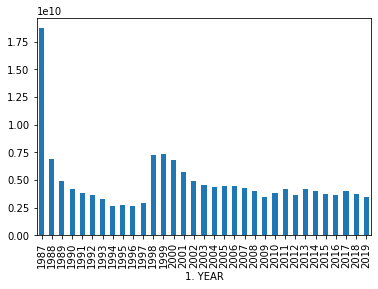

In [13]:
# Lets just look at total chemical releases by year. See if there's anything there
import seaborn as sns
import matplotlib.pyplot as plt

sumEmm_year = df.groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()

sumEmm_year.plot(kind='bar')
#not super exciting, might be able to attribute first decrease to the creation of the TRI, but probs not more

<AxesSubplot:xlabel='1. YEAR'>

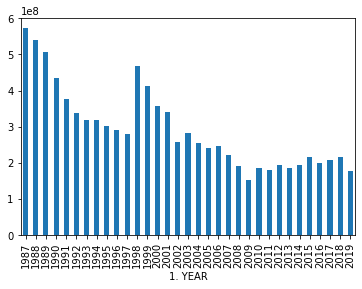

In [14]:
# Continue, but lets look at specific bad chemcials, starting with carcinogens

sumCarcinogens_year = df[df["42. CARCINOGEN"]=="YES"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()
sumCarcinogens_year.plot(kind='bar')

<AxesSubplot:xlabel='1. YEAR'>

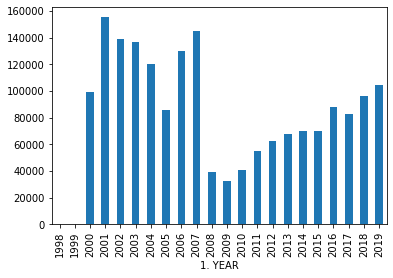

In [15]:
# Dioxins

sumDiox_year = df[df["39. CLASSIFICATION"]=="Dioxin"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()
sumDiox_year.plot(kind='bar')

<AxesSubplot:xlabel='1. YEAR'>

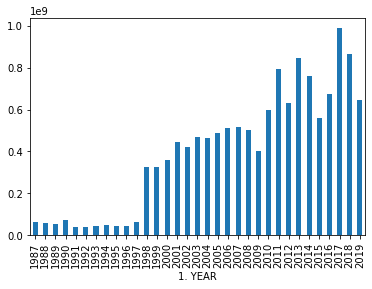

In [16]:
# PBTs

sumPBT_year = df[df["39. CLASSIFICATION"]=="PBT"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()
sumPBT_year.plot(kind='bar')

<AxesSubplot:xlabel='1. YEAR'>

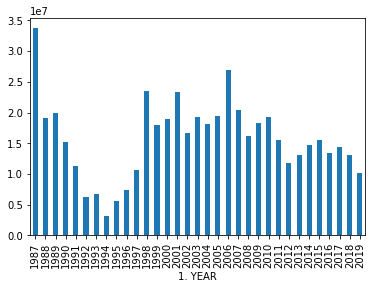

In [17]:
# So obviously, PBT/dioxin usage not decreasing... Is this due to addition of new compounds, or just greater use?

# Lets take some example PBTs

# lead
sumLead_year = df[df["34. CHEMICAL"]=="Lead"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum()
sumLead_year.plot(kind='bar')

# looks like they added more industries in 199 time, a well as more PBTs..

In [18]:
df["20. INDUSTRY SECTOR"].value_counts()
#  Wow this is a lot. Really only had chemicals/petroleum in my mind

Chemicals                            702194
Fabricated Metals                    301374
Primary Metals                       231126
Transportation Equipment             173953
Petroleum                            157776
Electric Utilities                   125001
Food                                 119210
Plastics and Rubber                  106415
Machinery                            104414
Nonmetallic Mineral Product          101383
Paper                                 96064
Petroleum Bulk Terminals              92945
Computers and Electronic Products     82813
Chemical Wholesalers                  61762
Electrical Equipment                  57964
Wood Products                         57774
Hazardous Waste                       57367
Other                                 40268
Furniture                             38063
Miscellaneous Manufacturing           35646
Textiles                              17507
Printing                              16180
Metal Mining                    

<AxesSubplot:xlabel='20. INDUSTRY SECTOR'>

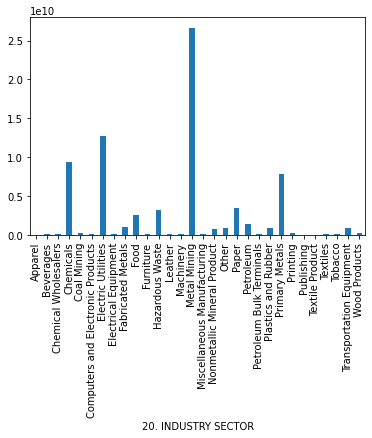

In [19]:
#Lets look at the magnitude...
sumChem_industry = df[df["1. YEAR"]>2001].groupby(["20. INDUSTRY SECTOR"])["101. TOTAL RELEASES"].sum()
sumChem_industry.plot(kind="bar")

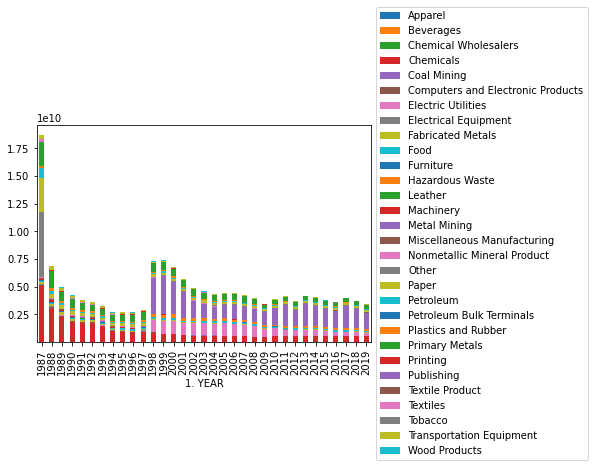

In [20]:
sumChem_byIndustry_year = df.groupby(["1. YEAR","20. INDUSTRY SECTOR"])["101. TOTAL RELEASES"].sum()
sumChem_byIndustry_year.unstack(level=1).plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

# Pretty chart, but think I will use to justify zeroing on jsut the chemicals industry...

### Zeroing in on the Chemical Industry

Seems like an interesting case study of the data. Also what I am personally the most interested in....



In [21]:
df_chemical = df[df["20. INDUSTRY SECTOR"]=="Chemicals"]
df_chemical

,1. YEAR,2. TRIFD,8. ST,15. PARENT CO NAME,20. INDUSTRY SECTOR,34. CHEMICAL,39. CLASSIFICATION,42. CARCINOGEN,45. 5.1 - FUGITIVE AIR,59. ON-SITE RELEASE TOTAL,82. OFF-SITE RELEASE TOTAL,101. TOTAL RELEASES,116. 8.9 - PRODUCTION RATIO,46. 5.2 - STACK AIR,47. 5.3 - WATER
0,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hydrogen cyanide,TRI,NO,0.00000,0.00000,203.100000,203.100000,0.00,NaN,NaN
2,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Vanadium compounds,TRI,NO,1.00000,264.57000,13130.440000,13395.010000,0.00,NaN,NaN
5,2019,66542FLXLN6000S,KS,NaN,Chemicals,Toluene,TRI,NO,23519.00000,87107.00000,0.000000,87107.000000,0.95,NaN,NaN
7,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Dioxin and dioxin-like compounds,Dioxin,YES,0.52882,5.41933,278.876856,284.296186,1.22,NaN,NaN
8,2019,77015FRMNT2239H,TX,SYNGENTA CORP,Chemicals,Hexachlorobenzene,PBT,YES,0.24000,322.24900,7222.748230,7544.997230,1.22,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2820086,2018,77571LPRTC2400M,TX,OCCIDENTAL CHEMICAL HOLDING CORP,Chemicals,Chloroform,TRI,YES,731.00000,1350.10000,0.210000,1350.310000,0.99,615.0,4.1
2820087,2018,77571LPRTC2400M,TX,OCCIDENTAL CHEMICAL HOLDING CORP,Chemicals,Lead compounds,PBT,NO,0.00000,62.00000,0.070000,62.070000,1.02,9.0,53.0
2820088,2018,60554FNSHSWHEEL,IL,ENGINEERED CUSTOM COATINGS LLC,Chemicals,sec-Butyl alcohol,TRI,NO,673.00000,1346.00000,0.000000,1346.000000,0.08,673.0,0.0
2820089,2018,40361MLLNCHIGHW,KY,AVANTOR PERFORMANCE MATERIALS INC,Chemicals,Methyl isobutyl ketone,TRI,YES,0.00000,0.00000,0.000000,0.000000,2.19,0.0,0.0


In [22]:
JM_df = df_chemical[df_chemical["15. PARENT CO NAME"]=="JOHNSON MATTHEY INC"] # my future employeer, might keep around if interested later...

<AxesSubplot:xlabel='1. YEAR'>

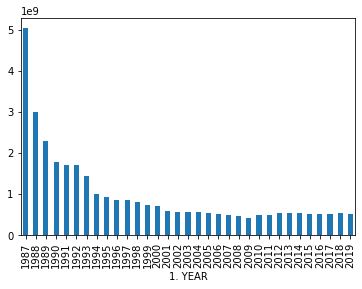

In [23]:
# All chemicals
df_chemical.groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum().plot(kind='bar') # hey you can do this in one line
### OOOOh a nice decrease with the introduction of the TRI, no longer confounded with the introduction of other industries

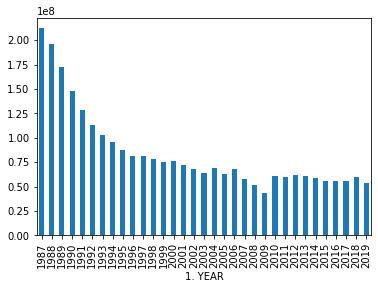

In [24]:
# Carinogens
# start only looking at chemical...
sumDioxChem_year = df_chemical[df_chemical["42. CARCINOGEN"]=="YES"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum().plot(kind='bar') # Methodology change to more group contribution in 2008

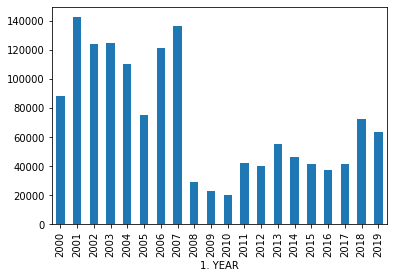

In [25]:
# Dioxins
sumDioxChem_year = df_chemical[df_chemical["39. CLASSIFICATION"]=="Dioxin"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum().plot(kind='bar') # Methodology change to more group contribution in 2008
# counfounded by normalizations - take into account

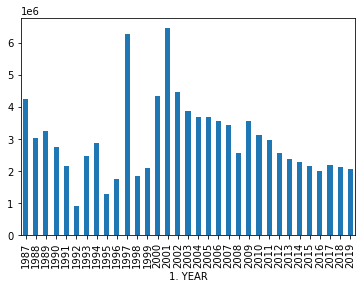

In [26]:
# PBT
sumDioxChem_year = df_chemical[df_chemical["39. CLASSIFICATION"]=="PBT"].groupby(["1. YEAR"])["101. TOTAL RELEASES"].sum().plot(kind='bar') # Methodology change to more group contribution in 2008
# confounded by additions - take into account

### Anaylsis ideas

Glad I restricted to the chemical industry
 - Look into controlling for production increase
 - Start to look at specific sites/companies
     - Case study notable chemicals (PFAS?)
 - Trends in emission types out of what we have
 - Start making own stats
     - Yearly decrease in specific chemical emitted
         - compare with production increase ratio
     - Shift in chemicals compositions within plants
  - Look at state trends


## Do plants get better at controlling emissions?

In [41]:
year_location = df_chemical.groupby(["1. YEAR","2. TRIFD"])["101. TOTAL RELEASES"].sum()

year_location

#df_chemical.groupby(["1. YEAR","2. TRIFD"])["116. 8.9 - PRODUCTION RATIO"].sum()

#df_chemical.groupby(["2. TRIFD"])["101. TOTAL RELEASES"].count()

1. YEAR  2. TRIFD       
1987     00613RSTNDROUTE          0.00
         00617BBTTCROADN     305421.00
         00617BRSTLSTATE     970700.00
         00617MRCKSSTATE    1285340.00
         00617PFZRPHIGHW     148450.00
                               ...    
2019     99337KRLYGROUTE       6558.45
         99352DVNCD2101H      81715.00
         9950WNRCLS298CM         10.00
         9973WBRDMD2555S          0.10
         9973WHLLBR285SP          2.30
Name: 101. TOTAL RELEASES, Length: 133468, dtype: float64

### Emission Type



In [54]:
fugAir = df_chemical.groupby(["1. YEAR"])["45. 5.1 - FUGITIVE AIR"].sum()

In [55]:
stackAir = df_chemical.groupby(["1. YEAR"])["46. 5.2 - STACK AIR"].sum()

In [64]:
#df.plot.bar(x="1. YEAR", y=[fugAir, stackAir], stacked=True)
df_emissionType = pd.concat({"Fugitive Air":fugAir,"Stack Air":stackAir},axis=1)
df_emissionType

,Fugitive Air,Stack Air
1. YEAR,,
1987,3.336865e+08,7.180807e+08
1988,2.678553e+08,6.954401e+08
1989,2.557644e+08,6.075319e+08
1990,2.254482e+08,5.354074e+08
1991,2.120035e+08,4.730907e+08
1992,1.766802e+08,4.597574e+08
1993,1.683660e+08,3.681562e+08
1994,1.272878e+08,3.412888e+08
1995,1.110482e+08,3.491192e+08


<AxesSubplot:xlabel='1. YEAR'>

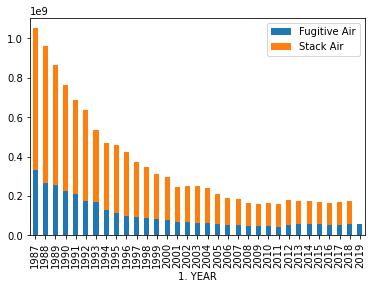

In [66]:
df_emissionType.plot.bar(y=['Fugitive Air', "Stack Air"], stacked=True)

### State


In [ ]:
# Difference in years might be easier here?